In [106]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from operator import length_hint
from statistics import mean
from turtle import filling
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfFile, PdfPages
#df = pd.read_csv("data/text/002(results).csv")
import statistics
import scipy
from sklearn import preprocessing
from sklearn.datasets import make_moons
from scipy.stats import pearsonr
from dtaidistance import dtw
from scipy.signal import hilbert, chirp
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import math
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from sklearn.feature_selection import mutual_info_regression
    

In [107]:
df = pd.read_csv("data/Text/scan_results/008pvalue_scan_results/008all_data_01_10_50.csv")


In [108]:
df = df.drop("Unnamed: 0", axis = 1)
scaled_data = df.drop("start", axis = 1)

'''name = list()
name = name + [f"start{x}" for x in range(100,381,10)]
df.set_axis(name,axis = "rows", inplace = True)'''


'name = list()\nname = name + [f"start{x}" for x in range(100,381,10)]\ndf.set_axis(name,axis = "rows", inplace = True)'

In [109]:
scaled_data = preprocessing.scale(scaled_data)

In [110]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

<function matplotlib.pyplot.show(close=None, block=None)>

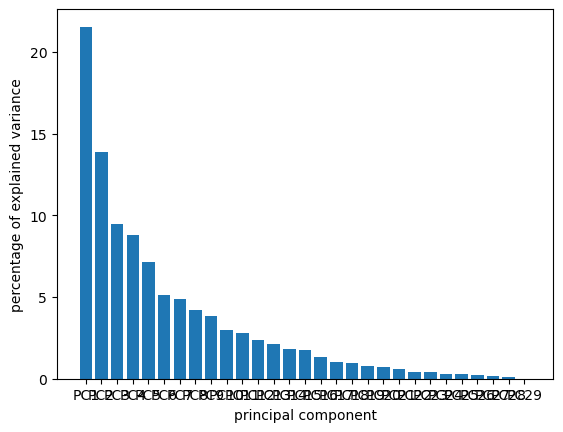

In [111]:
per_var = np.round(pca.explained_variance_ratio_*100, 2)
labels = ["PC"+str(x) for x in range(1, len(per_var)+1)]
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel("percentage of explained variance")
plt.xlabel("principal component")
plt.show

In [112]:
for i in range(len(per_var)):
    print(per_var[i])
print(sum(per_var))

21.55
13.85
9.5
8.78
7.17
5.13
4.91
4.2
3.86
2.99
2.82
2.37
2.12
1.79
1.75
1.33
1.0
0.98
0.79
0.72
0.61
0.41
0.39
0.28
0.26
0.21
0.14
0.08
0.0
99.99000000000001


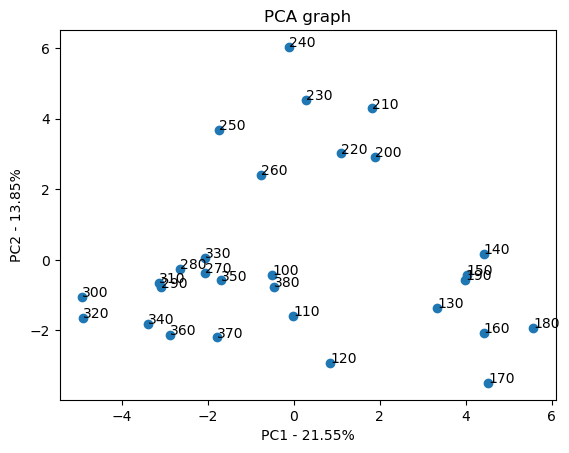

In [113]:
pca_df = pd.DataFrame(pca_data, index = list(df["start"]) , columns = labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

In [114]:
freq = [f"{i}" for i in range(10,51)]

In [115]:
loading_scores = pd.Series(pca.components_[1], index = freq)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(dict(sorted_loading_scores))
loading_scores_dict = dict(sorted_loading_scores)

{'42': 0.3322813467401687, '40': 0.3227175825370232, '29': 0.3026821695039648, '41': 0.3000189857457457, '31': 0.27594374216719686, '33': 0.25589993671099864, '50': 0.23703627579591874, '34': 0.21065957338991323, '35': 0.15907303871625625, '46': 0.15815160673808723, '49': 0.15532331027875534, '24': 0.15032896328393228, '26': 0.14852889854593965, '45': 0.14338325306631608, '25': 0.14024830872456834, '10': 0.13994913001813636, '36': 0.13981962287495667, '43': 0.12922202780663922, '17': 0.11999768045996077, '14': 0.11769866580756241, '16': 0.1165141542940343, '19': 0.11640242708787797, '37': 0.10697019551858597, '23': 0.10637620923379063, '47': 0.0961146964801009, '15': 0.0939252261143942, '44': 0.08168791130982953, '13': 0.0796830551230975, '27': 0.0790506479061874, '32': 0.0760506039181165, '20': 0.06881467971887854, '18': 0.06701845264953851, '12': 0.06613471096738016, '39': 0.059410860848156506, '48': 0.05288526730308199, '22': 0.04371871469297811, '11': 0.03897740891845446, '28': 0.0

In [116]:
print(loading_scores_dict["25"])

0.14024830872456834


In [117]:
c = dict()
for i in range(100,381,10):
    c[i] = i
print(c)
for start in df["start"]:
    a=0
    '''for number_PC in range(0,15): #從PC1跑到PC14，這邊的邏輯是直接把所有component的值加起來
        loading_scores = pd.Series(pca.components_[number_PC], index = freq)
        sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
        loading_scores_dict = dict(sorted_loading_scores)'''
    for i in loading_scores_dict.keys(): #計算每個PC 的所有係數乘上time zone的個別值
        a += float(loading_scores_dict[i]* float((df.loc[df["start"]==start][i])))
       
    print(a,",", end = "")
    c[start] = round(float(a),4)
print(c)
#print(df.loc[df["start"]==110]["10"])

{100: 100, 110: 110, 120: 120, 130: 130, 140: 140, 150: 150, 160: 160, 170: 170, 180: 180, 190: 190, 200: 200, 210: 210, 220: 220, 230: 230, 240: 240, 250: 250, 260: 260, 270: 270, 280: 280, 290: 290, 300: 300, 310: 310, 320: 320, 330: 330, 340: 340, 350: 350, 360: 360, 370: 370, 380: 380}
-0.6051527405721552 ,-0.5015112150101525 ,-0.6117613764266251 ,-0.27889745234775204 ,-0.6569681167499054 ,0.3257788580699858 ,0.7558317584483125 ,0.6195693107342563 ,0.8056304180089838 ,0.9216923317655042 ,-0.3905485780015769 ,-1.1515394994114998 ,-0.6408696389391095 ,-0.5097185945330612 ,-1.2416742153242482 ,-1.9506934786561299 ,-1.3860037706272907 ,-0.8285678393823116 ,-1.0241272215904853 ,-0.13231755836192138 ,-0.40207946206024897 ,-0.4170770444915093 ,0.0023313530836549263 ,0.5180214719809212 ,-0.06352563036003828 ,-0.14852889854593965 ,-0.32954090517538187 ,0.4040954523996678 ,0.4434620008357235 ,{100: -0.6052, 110: -0.5015, 120: -0.6118, 130: -0.2789, 140: -0.657, 150: 0.3258, 160: 0.7558, 170:

In [118]:
s = dict()
s[19] = 0.005
print(s)

{19: 0.005}


In [121]:
xs = np.array([-0.6051527405721552 ,-0.5015112150101525 ,-0.6117613764266251 ,-0.27889745234775204 ,-0.6569681167499054 ,0.3257788580699858 ,0.7558317584483125 ,0.6195693107342563 ,0.8056304180089838 ,0.9216923317655042 ,-0.3905485780015769 ,-1.1515394994114998 ,-0.6408696389391095 ,-0.5097185945330612 ,-1.2416742153242482 ,-1.9506934786561299 ,-1.3860037706272907 ,-0.8285678393823116 ,-1.0241272215904853 ,-0.13231755836192138 ,-0.40207946206024897 ,-0.4170770444915093 ,0.0023313530836549263 ,0.5180214719809212 ,-0.06352563036003828 ,-0.14852889854593965 ,-0.32954090517538187 ,0.4040954523996678 ,0.4434620008357235])
xs = xs/1000
ys = np.array([2.4118 ,2.465 ,2.391 ,2.4104 ,2.4024 ,2.3571 ,2.5135 ,2.5442 ,2.4453 ,2.3812 ,2.2316 ,2.2196 ,2.2433 ,2.1881 ,2.165 ,2.1468 ,2.1633 ,2.006 ,1.978 ,1.9526 ,1.9971 ,2.0042 ,2.1029 ,2.1248 ,2.2143 ,2.1938 ,2.1897 ,2.2209 ,2.2431])
print(len(xs))
print(len(ys))
#xs = stats.zscore(xs)
#ys = stats.zscore(ys)
pccs = pearsonr(xs,ys)
print(pccs)
xs = xs.reshape(-1,1)
ys = ys.reshape(-1,1)
'''scaler = MinMaxScaler(feature_range=(0,1)).fit(xs)
sxs = scaler.transform(xs)
scaler = MinMaxScaler(feature_range=(0,1)).fit(ys)
sys = scaler.transform(ys)'''
'''a = 4
b = 7
xs = xs[a:b]
ys = ys[a:b]'''
sklearn.feature_selection.mutual_info_regression(xs,ys,n_neighbors=3, discrete_features = 'auto')

29
29
(0.4060127300150008, 0.028860802464791408)


c:\Users\chang\anaconda3\envs\semantic\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.01538242])

In [ ]:
print(scores)
for x in scores.values():
    if x <0 :
        print(x)
    else:
        print(0)

{100: -0.7321433786830552, 110: -0.8055751582471179, 120: -0.7246164500811516, 130: -0.9822197021485325, 140: -1.770994114196788, 150: -1.049679438842823, 160: -0.535059679606765, 170: -0.6609130525468323, 180: -0.7074480461583588, 190: -0.5076138668447515, 200: -1.3685277855527032, 210: -1.8970339243744978, 220: -1.3004945884866257, 230: -1.6002606454466004, 240: -2.29535127366164, 250: -2.3228810989884288, 260: -1.5189913125804808, 270: -0.8787457172381705, 280: -1.0860432812881422, 290: -0.7176122927478731, 300: -1.0853261079633523, 310: -0.7384624634848262, 320: -0.9325714469567831, 330: -0.13990629172707333, 340: -0.5979692139866294, 350: -0.18784533195321834, 360: -0.4915336683400919, 370: -0.4821716437092444, 380: -0.019951046852359516}
-0.7321433786830552
-0.8055751582471179
-0.7246164500811516
-0.9822197021485325
-1.770994114196788
-1.049679438842823
-0.535059679606765
-0.6609130525468323
-0.7074480461583588
-0.5076138668447515
-1.3685277855527032
-1.8970339243744978
-1.300494

In [ ]:
pc1 = []
for i in range(len(loading_scores_dict)):
    pc1.append(df[""])

KeyError: ''